<a href="https://colab.research.google.com/github/AnirudhA3/pcb_board/blob/main/SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# STEP 1: Install Dependencies
# ==============================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# ==============================
# STEP 2: Import Libraries
# ==============================
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

print("✅ Libraries imported successfully!")

# ==============================
# STEP 3: Download the Pretrained SAM Model (ViT-B)
# ==============================
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# ==============================
# STEP 4: Load the Model
# ==============================
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

print("✅ SAM model (ViT-B) loaded successfully and ready to use!")


✅ Libraries imported successfully!
✅ SAM model (ViT-B) loaded successfully and ready to use!


📤 Please upload your PCB image (e.g., pcb_sample.jpg)


Saving dummy1.jpg to dummy1 (2).jpg
✅ Image uploaded successfully: dummy1 (2).jpg


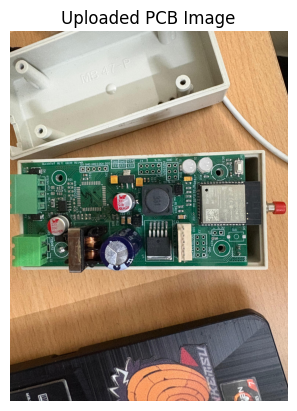

NameError: name 'sam' is not defined

In [1]:
# ==============================
# STEP 5: Upload a PCB Image
# ==============================
from google.colab import files
import cv2
import matplotlib.pyplot as plt

print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded successfully: {image_path}")

# Read and convert to RGB
image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load. Try uploading again.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# ==============================
# STEP 6: Run SAM for Mask Generation
# ==============================
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

print(f"✅ SAM detected {len(masks)} distinct regions/components!")

# ==============================
# STEP 7: Visualize All Segmented Masks
# ==============================
import numpy as np

mask_image = np.zeros_like(image)
for m in masks:
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
    mask_image[m["segmentation"]] = color

plt.figure(figsize=(10, 10))
plt.imshow(mask_image)
plt.title("SAM Segmented Regions (Each Color = Component)")
plt.axis('off')
plt.show()


In [2]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Reload the model (no need to reinstall again)
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

print("✅ SAM model loaded and ready again!")


✅ SAM model loaded and ready again!


✅ SAM model loaded successfully!
📤 Please upload your PCB image (e.g., pcb_sample.jpg)


Saving hosa.jpeg to hosa.jpeg
✅ Image uploaded: hosa.jpeg
🧩 Resized image to: 768x1024


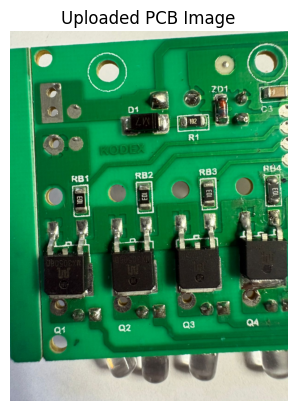

🔍 Running SAM... please wait (takes ~30-60 s)...
✅ SAM detected 55 regions/components!


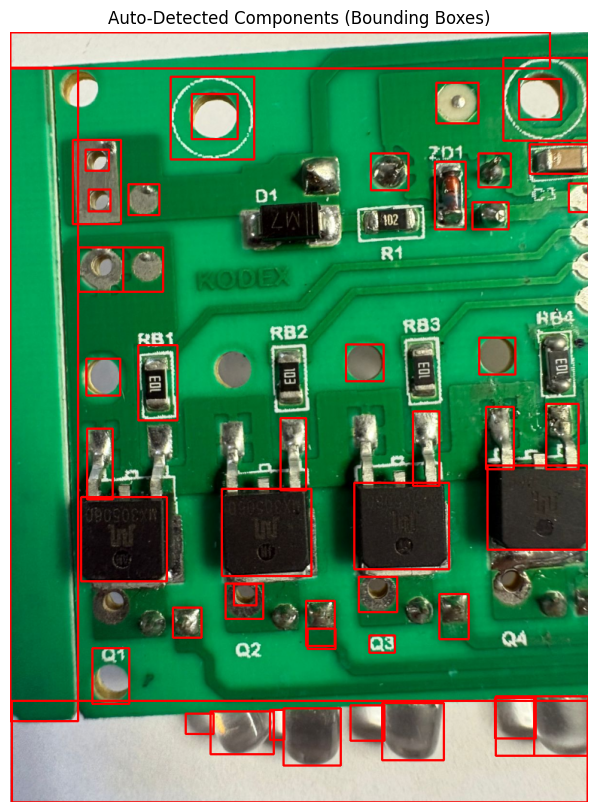

💾 Output saved as: pcb_with_boxes_optimized.jpg
✅ SAM model loaded successfully!
📤 Please upload your PCB image (e.g., pcb_sample.jpg)


In [ ]:
# =====================================
# STEP 1: Install required dependencies
# =====================================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# =====================================
# STEP 2: Import and load SAM (ViT-B)
# =====================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2, torch, numpy as np, matplotlib.pyplot as plt
from google.colab import files

# Download pretrained model
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# Load lightweight version of SAM
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
print("✅ SAM model loaded successfully!")

# =====================================
# STEP 3: Upload your PCB image
# =====================================
print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# =====================================
# STEP 4: Resize image to save RAM
# =====================================
max_size = 1024     # reduce resolution if needed
h, w = image.shape[:2]
scale = max_size / max(h, w)
if scale < 1:
    image = cv2.resize(image, (int(w*scale), int(h*scale)))
print(f"🧩 Resized image to: {image.shape[1]}x{image.shape[0]}")

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# =====================================
# STEP 5: Configure lightweight SAM mask generator
# =====================================
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,          # fewer sampling points (default 32)
    pred_iou_thresh=0.88,        # higher confidence
    stability_score_thresh=0.92, # ignore uncertain masks
    crop_n_layers=0,             # disable multiscale
    min_mask_region_area=500     # skip tiny noise regions
)

# =====================================
# STEP 6: Run SAM segmentation
# =====================================
print("🔍 Running SAM... please wait (takes ~30-60 s)...")
masks = mask_generator.generate(image)
print(f"✅ SAM detected {len(masks)} regions/components!")

# =====================================
# STEP 7: Draw bounding boxes around detected components
# =====================================
boxed = image.copy()
for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    if w*h > 400:   # filter small boxes
        cv2.rectangle(boxed, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(boxed)
plt.title("Auto-Detected Components (Bounding Boxes)")
plt.axis('off')
plt.show()

# =====================================
# STEP 8: Save output
# =====================================
out_path = "pcb_with_boxes_optimized.jpg"
cv2.imwrite(out_path, cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR))
print(f"💾 Output saved as: {out_path}")
# =====================================
# STEP 1: Install required dependencies
# =====================================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# =====================================
# STEP 2: Import and load SAM (ViT-B)
# =====================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2, torch, numpy as np, matplotlib.pyplot as plt
from google.colab import files

# Download pretrained model
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# Load lightweight version of SAM
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
print("✅ SAM model loaded successfully!")

# =====================================
# STEP 3: Upload your PCB image
# =====================================
print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# =====================================
# STEP 4: Resize image to save RAM
# =====================================
max_size = 1024     # reduce resolution if needed
h, w = image.shape[:2]
scale = max_size / max(h, w)
if scale < 1:
    image = cv2.resize(image, (int(w*scale), int(h*scale)))
print(f"🧩 Resized image to: {image.shape[1]}x{image.shape[0]}")

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# =====================================
# STEP 5: Configure lightweight SAM mask generator
# =====================================
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,          # fewer sampling points (default 32)
    pred_iou_thresh=0.88,        # higher confidence
    stability_score_thresh=0.92, # ignore uncertain masks
    crop_n_layers=0,             # disable multiscale
    min_mask_region_area=500     # skip tiny noise regions
)

# =====================================
# STEP 6: Run SAM segmentation
# =====================================
print("🔍 Running SAM... please wait (takes ~30-60 s)...")
masks = mask_generator.generate(image)
print(f"✅ SAM detected {len(masks)} regions/components!")

# =====================================
# STEP 7: Draw bounding boxes around detected components
# =====================================
boxed = image.copy()
for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    if w*h > 400:   # filter small boxes
        cv2.rectangle(boxed, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(boxed)
plt.title("Auto-Detected Components (Bounding Boxes)")
plt.axis('off')
plt.show()

# =====================================
# STEP 8: Save output
# =====================================
out_path = "pcb_with_boxes_optimized.jpg"
cv2.imwrite(out_path, cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR))
print(f"💾 Output saved as: {out_path}")
